# Homework Batch 1: Matrix Multiplication
### Marco Sicklinger, 03/2021

The work has been divided into four parts:

1. Implementation of Strassen's algorithm for $2^n$x$2^n$ matrices (matrix_even.py);
2. Implementation of Strassen's algorithm for the multiplication between two of any matrices following the original approach, storing each temporary result in a variable (matrix_original.py);
3. Implementation of an improved Strassen's algorithm, in which a smaller number of temporary results are saved in auxilary variables (matrix_improved.py);
4. Implementation of a Strassen's algorithm that makes use of the smallest possible amount of auxilary memory.

In [9]:
from random import random
from random import seed

## Part 1

The implementation of Strassen's algorithm for even sizes gives the following results.

In [10]:
import matrix_even as m_e
seed(0)

Consider first A, B to be square matrices of size:

In [11]:
n = 2**8

A = m_e.Matrix([[random() for j in range(n)] for i in range(n)])
print("A: matrix {}x{}".format(A.num_of_rows,A.num_of_cols))
B = m_e.Matrix([[random() for j in range(n)] for i in range(n)])
print("B: matrix {}x{}".format(B.num_of_rows,B.num_of_cols))

A: matrix 256x256
B: matrix 256x256


The standard gauss matrix multiplication obviously returns another square matrix of the same size, $2^8$x$2^8$.

In [12]:
GAUSS_MULT_EVEN = m_e.gauss_matrix_mult(A,B)
print("GAUSS_MULT_EVEN: matrix {}x{}".format(GAUSS_MULT_EVEN.num_of_rows, GAUSS_MULT_EVEN.num_of_cols))

GAUSS_MULT_EVEN: matrix 256x256


And same does the Strassen's multiplication.

In [13]:
STRASSEN_MULT_EVEN = m_e.strassen_matrix_mult(A,B)
print("STRASSEN_MULT_ORIGINAL: matrix {}x{}".format(STRASSEN_MULT_EVEN.num_of_rows,STRASSEN_MULT_EVEN.num_of_cols))

STRASSEN_MULT_ORIGINAL: matrix 256x256


If one computes the difference between the two methods, one can acknowledge that its being different from zero is only due to the arithmetic of the machine.  

In [14]:
DIFF_EVEN = GAUSS_MULT_EVEN - STRASSEN_MULT_EVEN
print("DIFF_EVEN: matrix {}x{}".format(DIFF_EVEN.num_of_rows,DIFF_EVEN.num_of_cols))
print("Maximum element of the difference matrix between the two methods: {}".format(DIFF_EVEN.max))

DIFF_EVEN: matrix 256x256
Maximum element of the difference matrix between the two methods: 2.984279490192421e-13


One can obtain similar results if rectangular matrices of even sizes are used, since the actual "problem" related to the Strassen's algorithm concerns odd dimensions.

In [15]:
m = 2**7
l = 2**6

A = m_e.Matrix([[random() for j in range(m)] for i in range(n)])
print("A: matrix {}x{}".format(A.num_of_rows,A.num_of_cols))
B = m_e.Matrix([[random() for j in range(l)] for i in range(m)])
print("B: matrix {}x{}".format(B.num_of_rows,B.num_of_cols))

A: matrix 256x128
B: matrix 128x64


In [16]:
GAUSS_MULT_EVEN = m_e.gauss_matrix_mult(A,B)
print("GAUSS_MULT_EVEN: matrix {}x{}".format(GAUSS_MULT_EVEN.num_of_rows, GAUSS_MULT_EVEN.num_of_cols))

GAUSS_MULT_EVEN: matrix 256x64


In [17]:
STRASSEN_MULT_EVEN = m_e.strassen_matrix_mult(A,B)
print("STRASSEN_MULT_ORIGINAL: matrix {}x{}".format(STRASSEN_MULT_EVEN.num_of_rows,STRASSEN_MULT_EVEN.num_of_cols))

STRASSEN_MULT_ORIGINAL: matrix 256x64


In [18]:
DIFF_EVEN = GAUSS_MULT_EVEN - STRASSEN_MULT_EVEN
print("DIFF_EVEN: matrix {}x{}".format(DIFF_EVEN.num_of_rows,DIFF_EVEN.num_of_cols))
print("Maximum element of the difference matrix between the two methods: {}".format(DIFF_EVEN.max))

DIFF_EVEN: matrix 256x64
Maximum element of the difference matrix between the two methods: 9.237055564881302e-14


## Part 2

The issue raised by the multiplication of matrices of odd sizes has been solved by adding a null row and/or column (row or column full of zeros) when needed, that is when the number of rows and/or the number of columns of a given matrix are odd. An example of the result obtained is the following.

For the sake of simplicity, assume that the matrices involved in the multiplication are square matrices. Strassen's algorithm complexity is given by 
$$
T(n)=\sum_{i=0}^{\log_2n}7^iC\left(\frac{n}{2^i} \right)^2
$$
If the size of the matrices is odd, it is increased by one to make it even, that is $n\rightarrow n+1$. This means the following change in the complexity of the algorithm:
$$
\begin{align*}
T(n)\,\,\xrightarrow{n\rightarrow n+1}\,\, T(n+1) &= C\sum_{i=0}^{\log_2(n+1)}\left(\frac{7}{4}\right)^i(n+1)^2 \\
&= C'(n+1)^2\left[\left(\frac{7}{4} \right)^{\log_2(n+1)+1}-1 \right],\,\,\,C'=C\left[\frac{7}{4}-1 \right]^{-1} \\
&= C''(n+1)^2\left(\frac{7}{4} \right)^{\log_2(n+1)}-C'(n+1)^2,\,\,\,C''=\frac{7}{4}C' \\
&= C''(n+1)^2\frac{7^{\log_2(n+1)}}{2^{2\log_2(n+1)}}-C'(n+1)^2 \\
&= C''(n+1)^2\frac{(n+1)^{\log_27}}{(n+1)^2}-C'(n+1)^2 \\
&= C''(n+1)^{\log_27}-C'(n+1)^2 \,\,\in \,\, \Theta [(n+1)^{log_27}] = \Theta [(n)^{log_27}],
\end{align*}
$$
which is actually the same as before

Consider the following sizes:

In [19]:
n = 108
m = 77
l = 99

In [20]:
import matrix_original as m_o
seed(0)

And define two matrices with suitable dimensions: a first $n$x$m$ matrix and a second $m$x$l$.

In [21]:
A = m_o.Matrix([[random() for j in range(m)] for i in range(n)])
print("A: matrix {}x{}".format(A.num_of_rows,A.num_of_cols))
B = m_o.Matrix([[random() for j in range(l)] for i in range(m)])
print("B: matrix {}x{}".format(B.num_of_rows,B.num_of_cols))

A: matrix 108x77
B: matrix 77x99


Then, perform the matrix multiplication with the two methods.

In [22]:
GAUSS_MULT_ORIGINAL = m_o.gauss_matrix_mult(A,B)
print("GAUSS_MULT_ORIGINAL: matrix {}x{}".format(GAUSS_MULT_ORIGINAL.num_of_rows,GAUSS_MULT_ORIGINAL.num_of_cols))

GAUSS_MULT_ORIGINAL: matrix 108x99


In [23]:
STRASSEN_MULT_ORIGINAL = m_o.strassen_matrix_mult(A,B)
print("STRASSEN_MULT_ORIGINAL: matrix {}x{}".format(STRASSEN_MULT_ORIGINAL.num_of_rows,STRASSEN_MULT_ORIGINAL.num_of_cols))

STRASSEN_MULT_ORIGINAL: matrix 108x99


The obtained result is similar to what was obtaind in *part 1*.

In [24]:
DIFF_ORIGINAL = GAUSS_MULT_ORIGINAL - STRASSEN_MULT_ORIGINAL
print("DIFF_ORIGINAL: matrix {}x{}".format(DIFF_ORIGINAL.num_of_rows,DIFF_ORIGINAL.num_of_cols))
print("Maximum element of the difference matrix between the two methods: {}".format(DIFF_ORIGINAL.max))

DIFF_ORIGINAL: matrix 108x99
Maximum element of the difference matrix between the two methods: 2.1316282072803006e-14


## Part 3

A first improvement to the above algorithm was to reduce the number of auxiliary variables used in the procedure. Only the matrices $P_i$ with $i=1,2,3,4,5$ where kept (and, of course, the final `result` matrix), since used more than once during the construction of the final matrix.

In the example below, the matrices involved in the multiplication have sizes $n$x$m$ and $m$x$l$ with $n$, $m$, $l$ defined before.

In [25]:
import matrix_improved as m_i
seed(0)

In [26]:
A = m_i.Matrix([[random() for j in range(m)] for i in range(n)])
print("A: matrix {}x{}".format(A.num_of_rows,A.num_of_cols))
B = m_i.Matrix([[random() for j in range(l)] for i in range(m)])
print("B: matrix {}x{}".format(B.num_of_rows,B.num_of_cols))

A: matrix 108x77
B: matrix 77x99


In [27]:
GAUSS_MULT_IMPROVED = m_i.gauss_matrix_mult(A,B)
print("GAUSS_MULT_IMPROVED: matrix {}x{}".format(GAUSS_MULT_IMPROVED.num_of_rows,GAUSS_MULT_IMPROVED.num_of_cols))

GAUSS_MULT_IMPROVED: matrix 108x99


In [28]:
STRASSEN_MULT_IMPROVED = m_i.strassen_matrix_mult(A,B)
print("STRASSEN_MULT_IMPROVED: matrix {}x{}".format(STRASSEN_MULT_IMPROVED.num_of_rows,STRASSEN_MULT_IMPROVED.num_of_cols))

STRASSEN_MULT_IMPROVED: matrix 108x99


In [29]:
DIFF_IMPROVED = GAUSS_MULT_IMPROVED - STRASSEN_MULT_IMPROVED
print("DIFF_IMPROVED: matrix {}x{}".format(DIFF_IMPROVED.num_of_rows,DIFF_IMPROVED.num_of_cols))
print("Maximum element of the difference matrix between the two methods: {}".format(DIFF_IMPROVED.max))

DIFF_IMPROVED: matrix 108x99
Maximum element of the difference matrix between the two methods: 2.1316282072803006e-14


In [30]:
from timeit import timeit

In [31]:
A = m_i.Matrix([[random() for j in range(m)] for i in range(n)])

B = m_i.Matrix([[random() for j in range(l)] for i in range(m)])

T = timeit('m_i.strassen_matrix_mult(A,B)', globals=locals(), number = 100)

print("Avarage time to perform Strassen multiplication between randomized {}x{} and {}x{} matrices is: {}".format(n,m,m,l,T/100))

Avarage time to perform Strassen multiplication between randomized 108x77 and 77x99 matrices is: 0.19977478852000785


## Part 4

Finally, there has been an attempt to reduce as much as possible the number of auxiliary variables previously used in the Strassen algorithm implementations. The only one kept is the `result` matrix, in which one stores the final output before returning it.

In the example below, the involved matrices have the same characteristics as the ones above.

In [32]:
import matrix_memory as m_m
seed(0)

In [33]:
A = m_m.Matrix([[random() for j in range(m)] for i in range(n)])
print("A: matrix {}x{}".format(A.num_of_rows,A.num_of_cols))
B = m_i.Matrix([[random() for j in range(l)] for i in range(m)])
print("B: matrix {}x{}".format(A.num_of_rows,A.num_of_cols))

A: matrix 108x77
B: matrix 108x77


In [34]:
GAUSS_MULT_MEMORY = m_m.gauss_matrix_mult(A,B)
print("GAUSS_MULT_MEMORY: matrix {}x{}".format(GAUSS_MULT_MEMORY.num_of_rows,GAUSS_MULT_MEMORY.num_of_cols))

GAUSS_MULT_MEMORY: matrix 108x99


In [35]:
STRASSEN_MULT_MEMORY = m_m.strassen_matrix_mult(A,B)
print("STRASSEN_MULT_MEMORY: matrix {}x{}".format(STRASSEN_MULT_MEMORY.num_of_rows,STRASSEN_MULT_MEMORY.num_of_cols))

STRASSEN_MULT_MEMORY: matrix 108x99


In [36]:
DIFF_MEMORY = GAUSS_MULT_MEMORY - STRASSEN_MULT_MEMORY
print("DIFF_MEMORY: matrix {}x{}".format(DIFF_MEMORY.num_of_rows,DIFF_MEMORY.num_of_cols))
print("Maximum element of the difference matrix between the two methods: {}".format(DIFF_MEMORY.max))

DIFF_MEMORY: matrix 108x99
Maximum element of the difference matrix between the two methods: 2.1316282072803006e-14


However one can notice that the time taken to perform the task increases. This is probably due to the fact that now all the involved quantities must be computed over and over again every time they are needed.

In [37]:
A = m_m.Matrix([[random() for j in range(m)] for i in range(n)])

B = m_m.Matrix([[random() for j in range(l)] for i in range(m)])

T = timeit('m_m.strassen_matrix_mult(A,B)', globals=locals(), number = 100)

print("Avarage time to perform Strassen multiplication between randomized {}x{} and {}x{} matrices is: {}".format(n,m,m,l,T/100))

Avarage time to perform Strassen multiplication between randomized 108x77 and 77x99 matrices is: 0.3758705899199776


## Execution time vs size

In [39]:
from random import random
from random import seed

from sys import stdout

from timeit import timeit

from matrix_original import Matrix, gauss_matrix_mult

seed(0)

f = open("exect_vs_size.txt","w")

columns = ['size','Gauss matrix multiplication', 'Strassen matrix multiplication (original)','Strassen matrix multiplication (improved)', 'Strassen matrix multiplication (memory)']

steps = range(12)

times = [[0 for j in steps] for i in columns]

for i in steps:
    size = 2**i
    stdout.write(f'{size}')
    times[0][i] = size
    A = Matrix([[random() for x in range(size)] for y in range(size)])
    B = Matrix([[random() for x in range(size)] for y in range(size)])

    j = 1

    for funct in ['gauss_matrix_mult', 'm_o.strassen_matrix_mult', 'm_i.strassen_matrix_mult', 'm_m.strassen_matrix_mult']:
        T = timeit(f'{funct}(A,B)', globals=locals(), number=1) 
        stdout.write('\t{:.3f}'.format(T)) 
        stdout.flush() 
        times[j][i] = T
        j += 1

    stdout.write('\n')

1	0.000	0.000	0.000	0.000
2	0.000	0.000	0.000	0.000
4	0.000	0.000	0.000	0.000
8	0.000	0.000	0.000	0.000
16	0.003	0.003	0.003	0.003
32	0.015	0.014	0.012	0.013
64	0.098	0.084	0.085	0.129
128	0.597	0.459	0.494	1.377
256	4.241	3.217	3.481	18.419
512	42.647	28.880	30.559	219.122
1024	317.569	178.442	192.915	2952.991
2048	2976.261	1367.344	1500.577	36638.651


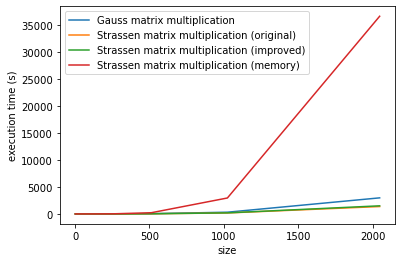

In [40]:
import matplotlib.pyplot as plt 

_ = [plt.plot(times[0], times[i], label = columns[i]) for i in range(1,5)]
__ = plt.xlabel('size') 
___ = plt.ylabel('execution time (s)')
____ = plt.legend()

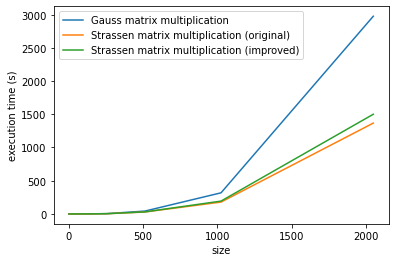

In [41]:
_ = [plt.plot(times[0], times[i], label = columns[i]) for i in range(1,4)]
__ = plt.xlabel('size') 
___ = plt.ylabel('execution time (s)')
____ = plt.legend()

## Final question: how much is the minimum auxiliary space required to evaluate the Strassen’s algorithm?

In order to answer the question we can consider two scenarios:

1. The *worst case* scenario;
2. The *best case* scenario;

Then we apply it to the implementation of the Strassen's algorithm that requires the minimum amount of memory to be carried out, that is the one that does not store any temporary result and computes all the quantities every time they are needed, saving the results directly in the final matrix that will be returned. 

### Worst case scenario
In this case all the sizes of the matrices involved in the multiplication are odd. It is then needed to insert a null row and a null column in both matrices. If the multiplication is performed using a first $n$x$m$ matrix and a second $m$x$l$ matrix, the aforementioned procedure takes an amount of memory proportional to
$$
(n+m+1)+(m+l+1)=n+2m+l+2.
$$
In addition to that, the `result` matrix takes an $(n+1)$x$(l+1)$ amount of space. Then, at each step of the recursion the amount of space required is proportional to 
$$
s_i \propto (n+1)(l+1)+n+2m+l+C = nl+2(n+m+l)+C,
$$
where the constat $C$ takes also account of the constant amount of space required by the two auxiliary variables that stores the original number of rows of the first matrix ($n$) and the original number of columns of the second matrix ($l$).

According to the implementation that has been carried out, the recursion stops when the maximum between all the sizes $M=\max(n,m,l)$ is smaller than a given threshold. If we suppose to set this threshold to the scalar multiplication, the height of the recursion tree will be $\log_2 M$.

Then the amount of space required by the process is 
$$
\begin{align*}
S &\propto \sum_{i=0}^{\log_2 M}\left[\frac{n}{2^i}\frac{l}{2^i}+\frac{2(n+l+m)}{2^i}+C \right]\\
&= nl\sum_{i=0}^{\log_2 M}\frac{1}{4^i}+2(n+m+l)\sum_{i=0}^{\log_2 M}\frac{1}{2^i}+C\sum_{i=0}^{\log_2 M}\\
&= nl\left(\frac{4}{3}-\frac{1}{3M^2} \right)+2(n+m+l)\left(2-\frac{1}{M} \right)+C\log_22M\\
&= \frac{4}{3}nl+2(n+m+l)-\frac{nl}{3[\max(n,m,l)]^2}-2\frac{n+m+l}{\max(n,m,l)}+C\log_2[2\max(n,m,l)],
\end{align*}
$$
which, at large sizes, is dominated by a quadratic term.

For square matrices ($n=m=l$) one obtains
$$
S \propto \frac{4}{3}n^2+6n-\frac{n^2}{3[n]^2}-2\frac{3n}{n}+C\log_22n=\frac{4}{3}n^2+6n+C\log_22n+C',\,\,\,C'=-\frac{1}{3}-6.
$$

### Best case scenario
In this case all the sizes of the matrices involved in the multiplication are even, making unnecessary to insert any row or column. If one has two matrices $n$x$m$ and $m$x$l$, the `result` matrix for the final output will be of order $n$x$l$. So at each step of the recursion the amount of space needed is proportional to
$$
nl + C.
$$
The total amount of space required is then proportional to
$$
\begin{align*}
S &\propto \sum_{i=0}^{\log_2M}\frac{n}{2^i}\frac{l}{2^i}+\sum_{i=0}^{\log_2M}C\\
&= nl\sum_{i=0}^{\log_2M}\frac{1}{4^i}+C\sum_{i=0}^{\log_2M}\\
&= \frac{4}{3}nl-\frac{nl}{3[\max(n,m,l)]^2}+C\log_2[2\max(n,m,l)].
\end{align*}
$$
Again, for large sizes, one obtains a quadratic behavior.

For square matrices:
$$
S \propto \frac{4}{3}n^2-\frac{n^2}{3[n]^2}+C\log_2[2n] = \frac{4}{3}n^2+C\log_22n+C',\,\,\,C'=-\frac{1}{3} 
$$